# Data Wrangling Template

## Gather

In [1456]:
import requests
import os
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In this project we collected data from following sources.

1. **WeRateDogs Twitter archive**  : We received a CSV file `twitter_archive_enhanced.csv` as part of this project which was downloaded manually. We stored this file in a dataframe `twitter_archive_df`.

2. **Tweet image predictions**  : The tweet image prediction file `image_predictions.tsv` was hosted on Udacity's server. We download this file programmatically.We stored this file in a dataframe `image_predictions_df`.

3. **Tweet's retweet count and favorite count**  : We collected this data by using Twitter API and Python's Tweepy library.
Using the tweet IDs in the WeRateDogs Twitter archive we queried the Twitter API using Python's Tweepy library and stored each tweet' in a file called tweet_json.txt file.  Later we extracted the retweet count and favorite count from each tweet and stored in a panda dataframe. We stored this information in a dataframe `tweets_df`.

In [4]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [19]:
#he tweet image predictions is present in each tweet according to a neural network. 
#This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

# Make directory if it doesn't already exist
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

#download the file from the URL    
image_prediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(image_prediction_url)
with open(os.path.join(folder_name,image_prediction_url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

#check if file downloaded in directory
os.listdir(folder_name)    

['image-predictions.tsv']

In [5]:
image_predictions_df= pd.read_csv('image_prediction/image-predictions.tsv', sep='\t')
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count

In [38]:
#create an API object to gather Twitter data.
import tweepy

consumer_key = 'YOUR CONSUMER KEY'    
consumer_secret = 'YOUR CONSUMER SECRET'   
access_token = 'YOUR ACCESS TOKEN'   
access_secret = 'YOUR ACCESS SECRET'   
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [39]:
#create an Arrray of tweet ids 
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

2356

In [40]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [7]:
# In below code I will read tweet_json.txt file and from each json line,I will extract the keys (i.e id,favorite_count,retweet_count)
# We will create the temporary dictionary out of these keys which will be appended in a list.

#List to store the dictionaries
tweets_list = []

tweet_json_file = open('tweet_json.txt', 'r')
for line in tweet_json_file:
    try:
        my_dict = {}
        tweet = json.loads(line)
        
        my_dict['id'] = tweet.get('id')
        my_dict['favorite_count'] = tweet.get('favorite_count')
        my_dict['retweet_count'] = tweet.get('retweet_count')
        #print(my_dict)
        tweets_list.append(my_dict)
    except Exception as e:
        print("Faile : " + str(e))
        pass
tweet_json_file.close()


In [1266]:
len(tweets_list),len(fails_dict)

In [9]:
# Create a Panda data frame from tweets_list
tweets_df = pd.DataFrame(tweets_list)
tweets_df.head()

,id,favorite_count,retweet_count
0,892420643555336193,36283,7723
1,892177421306343426,31284,5714
2,891815181378084864,23559,3786
3,891689557279858688,39572,7882
4,891327558926688256,37796,8500


In [131]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


## Assess

In [314]:
# Display the twitter archive table
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2115,670428280563085312,NaN,NaN,2015-11-28 02:25:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Willy. He's millennial af. 11/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670428280...,11,10,Willy,None,None,None,None
2199,668779399630725120,NaN,NaN,2015-11-23 13:13:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevon. He is not physically or mentall...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668779399...,10,10,Kevon,None,None,None,None
928,754747087846248448,NaN,NaN,2016-07-17 18:38:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's pursuing a more 2D lifesty...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754747087...,12,10,Keith,None,None,None,None
1679,682032003584274432,NaN,NaN,2015-12-30 02:54:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ulysses. He likes holding hands and hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682032003...,11,10,Ulysses,None,None,None,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [153]:
# Check for Not Null and Data type
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

There are 2356 rows.We have few missing values in `expanded_urls` column but lot of missing values in `in_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_id`,`retweeted_status_user_id` and `retweeted_status_timestamp`. Later we will decide what to do with these columns.
We also noticed that data type of `timestamp` and `retweeted_status_timestamp` is object but it should be date.

`twitter_archive_df` columns:
- **tweet_id**: the unique identifier for each tweet
- **in_reply_to_status_id**: 
- **in_reply_to_user_id**:
- **source**: Source of the tweet
- **timestamp**: Timestamp of the tweet
- **text**:  tweet's text,used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo)
- **retweeted_status_id**: 
- **retweeted_status_user_id**: 
- **retweeted_status_timestamp**:
- **expanded_urls**: Tweet Url in format "https://twitter.com/dog_rates/status/tweet_id"
- **rating_numerator**: Almost always greater than 10
- **rating_denominator**: Ratings almost always have a denominator of 10.
- **name**: Name of the dog extracted from `text` column
- **doggo**: Big or Older dog
- **floofer**: Any dog
- **pupper**: Small or Younger sog
- **puppo**: Transition phase between pupper and doggo.

In [191]:
# Check if we have any duplicate tweet id.
twitter_archive_df.tweet_id.nunique()

2356

In [174]:
# Check for different names
twitter_archive_df.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
his          1
Sage         1
Mona         1
Oreo         1
Ruffles      1
Name: name, Length: 957, dtype: int64

Above result shows that 745 dogs have missing name. It also looks like few names are not correct e.g. 'a'. Will try to fix it.

In [48]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [56]:
# ratings almost always have a numerators, always greater than 10
twitter_archive_df[(twitter_archive_df.rating_numerator < 10)].shape

(440, 17)

We have 440 entires where numerators is less than 10

In [34]:
# ratings almost always have a denominator of 10.
twitter_archive_df[(twitter_archive_df.rating_denominator!=10)].shape

(23, 17)

We have 23 entires where denominator is either greater or less than 10

In [338]:
#Check different source
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

We have four different sources for tweets inside a xml tag. We will clean by replacing it with the value inside xml tag.

In [339]:
# Check dog stages doggo,floofer,pupper,puppo
twitter_archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

Since we have 4 different stagesfor a dog in this dataset, we can melt 4 columns into a single column

In [194]:
#Analyze expanded_urls values
twitter_archive_df.expanded_urls.sample(300)

634     https://twitter.com/dog_rates/status/791672322...
1146                        https://vine.co/v/ixa1ejbXiM7
1766    https://twitter.com/dog_rates/status/678399652...
1279    https://twitter.com/dog_rates/status/708845821...
618     https://twitter.com/dog_rates/status/796149749...
                              ...                        
922     https://twitter.com/dog_rates/status/756275833...
1395    https://twitter.com/dog_rates/status/699801817...
1745    https://twitter.com/dog_rates/status/679148763...
1092    https://twitter.com/dog_rates/status/737322739...
65      https://twitter.com/dog_rates/status/879492040...
Name: expanded_urls, Length: 300, dtype: object

"https://vine.co/v/ixa1ejbXiM7" doesn't look like correct tweet URL. We will fix it .

In [977]:
# Check for duplicates in expanded_urls
twitter_archive_df.expanded_urls.duplicated().sum()

137

We found 137 duplicates tweet url's which is incorrect. Since we have unique tweet id's in our data set. We will fix this as well.

In [340]:
# Display the Image prediction archive table
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
67,667177989038297088,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,1,vizsla,0.259249,True,Chesapeake_Bay_retriever,0.176293,True,Weimaraner,0.112369,True
81,667470559035432960,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
639,681297372102656000,https://pbs.twimg.com/media/CXR0WJ_W8AMd_O8.jpg,1,Lhasa,0.482401,True,Shih-Tzu,0.113672,True,Pomeranian,0.096229,True
2011,879008229531029506,https://pbs.twimg.com/media/DDLdUrqXYAMOVzY.jpg,1,vizsla,0.960513,True,miniature_pinscher,0.009431,True,American_Staffordshire_terrier,0.008711,True


In [206]:
# Check for NULL and Datatype
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are 2075 entries. None of the columns have missing values.

`image_predictions_df` columns:
- **tweet_id**: the unique identifier for each tweet(i.e. is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921)
- **jpg_url**: url of the dog's image
- **img_num**: Image number out of 4.
- **p1**: algorithm's #1 prediction for the image in the tweet
- **p1_conf**:   how confident the algorithm is in its #1 prediction
- **p1_dog**: whether or not the #1 prediction is a breed of dog 
- **p2**: algorithm's 2nd prediction for the image in the tweet
- **p2_conf**: how confident the algorithm is in its #2 prediction
- **p2_dog**: whether or not the #2 prediction is a breed of dog 
- **p3**: algorithm's 3rd prediction for the image in the tweet
- **p3_conf**: how confident the algorithm is in its #3 prediction
- **p3_dog**: whether or not the #3 prediction is a breed of dog 

In [247]:
# check some image url if they are working or not
image_predictions_df.jpg_url.sample(30)

108       https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg
1206      https://pbs.twimg.com/media/CkylrVWWsAAiXJE.jpg
1577      https://pbs.twimg.com/media/CwxfrguUUAA1cbl.jpg
1307    https://pbs.twimg.com/ext_tw_video_thumb/75342...
1966      https://pbs.twimg.com/media/DAr0tDZXUAEMvdu.jpg
350       https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg
928       https://pbs.twimg.com/media/CcBwOn0XEAA7bNQ.jpg
1548      https://pbs.twimg.com/media/CwDjoH3WAAIniIs.jpg
1312    https://pbs.twimg.com/ext_tw_video_thumb/75448...
598       https://pbs.twimg.com/media/CW7bkW6WQAAksgB.jpg
571     https://pbs.twimg.com/ext_tw_video_thumb/67839...
1289    https://pbs.twimg.com/ext_tw_video_thumb/75125...
1716      https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg
1385      https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg
939       https://pbs.twimg.com/media/CcRKOzyXEAQO_HN.jpg
1303      https://pbs.twimg.com/media/CnNKCKKWEAASCMI.jpg
641       https://pbs.twimg.com/media/CXSJGAQUQAAoG9Q.jpg
0         http

Above result shows that we have few images don't belong to dog (e.g. https://pbs.twimg.com/media/CkylrVWWsAAiXJE.jpg)

In [301]:
# Check for different dog breeds
image_predictions_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
carton                  1
long-horned_beetle      1
convertible             1
agama                   1
marmot                  1
Name: p1, Length: 378, dtype: int64

As we see here,dog breeds name start with both Capital and Small letter. We will fix it later.

In [304]:
# Check for p1/ 1st prediction
image_predictions_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

Above result shows that out of 2075, 543 images don't belong to dog.

In [306]:
# Check for p2/ 2nd prediction

image_predictions_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

Above result shows that out of 2075, 522 images don't belong to dog.

In [307]:
# Check for p3/ 3rd prediction
image_predictions_df.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

Above result shows that out of 2075, 576 images don't belong to dog.

In [309]:
# Display the Tweet
tweets_df.head()

,id,favorite_count,retweet_count
0,892420643555336193,36283,7723
1,892177421306343426,31284,5714
2,891815181378084864,23559,3786
3,891689557279858688,39572,7882
4,891327558926688256,37796,8500


In [310]:
# Check for NULL and Datatype
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


There are 2331 entries. None of the columns have missing values.

`tweets_df` columns:
- **id**: the unique identifier for each tweet.
- **favorite_count**: Numer of likes
- **retweet_count**: Number of retweets 

since above table contains information related to specific tweet, we will merge this table with `tweets_df` later.

#### Quality
##### `twitter_archive_df` table
1.  Remove columns not required for Analysis `in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp`
2. Erroneous datatype: timestamp column
3. Replace None with NaN in `name` column
4. Fix the wrong name like 'a','an' in `Name` column
5. `Name` should be in Title case
6. Fix ths wrong url in `expanded_urls` columns. ex.`.                    https://vine.co/v/iKuMDuYV0aZ`
7. Fixed missing value and remove duplicates in `expanded_urls` column.It should be "https://twitter.com/dog_rates/status/tweet_id"
8. Delete the 23 entires where `rating_denominator` is either greater or less than 10 in order to keep the rating level consistent.
9. Delete entries with outliers in `rating_numerator`.(i.e. `rating_numerator > 100`)
10. Change the datatype of `tweet_id` from `int` to `str`
11. Clean `sources` column by replacing it's value with the value inside xml tag.


##### `image_predictions_df` table
12. Delete rows where predicated image is not a dog (i.e. p1_dog, p2_dog and p3_dog are False)
13. p1,p2 and p3 should be in Title case 
14. Change the datatype of `tweet_id` from `int` to `str`

##### `tweets_df` table
15.  Change the column name `id` to `tweet_id` in `tweets_clean`. Datatype of `tweets_clean` shoud be `str`.

#### Tidiness
1. Create a categorical column called `dog_stage` and populate it by extracting value from `text` column. Change the datatype of `dog_stage` to category. Drop the `doggo`, `floofer`, `pupper`, `puppo` columns.
2. Create 3 new columns `month`, `year`,`day` and populate it by extracting value from `timestamp` column.
3. Merge `twitter_archive_df`  and  `tweets_df` dataframe.
4. Merged new data frame from step 3  with  `image_predictions_df` dataframe and named it `twitter_archive_master`.

## Clean

In [1387]:
# Create copy of original data set
twitter_archive_clean = twitter_archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
tweets_clean = tweets_df.copy()

#### Define
**1. Remove columns not required for Analysis `in_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`**
from twitter_archive_clean

#### Code

In [1388]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test

In [1389]:
# Confirm the clean was executed correctly
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


#### Define
**2. Erroneous datatype: timestamp column in twitter_archive_clean**

#### Code

In [1390]:
# Remove the white spaces if any 
twitter_archive_clean.timestamp=twitter_archive_clean.timestamp.str.strip()

In [1391]:
twitter_archive_clean.timestamp= pd.to_datetime(twitter_archive_clean['timestamp']) 

#### Test

In [1392]:
# Confirm the data type change was executed correctly
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Define
**3. Replace None with NaN in 'name' column**

#### Code

In [1393]:
twitter_archive_clean.name = twitter_archive_clean.name.replace('None', np.nan)

#### Test

In [1394]:
twitter_archive_clean.name.value_counts()

a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
            ..
Kollin       1
Darby        1
Milky        1
Brockly      1
Godzilla     1
Name: name, Length: 956, dtype: int64

#### Define
**4. Fix the wrong name like 'a','an','his' in 'Name' column**

Not taking any action on this assuming dogs may have the same name.

#### Define
**5. Name should be in Title case**

#### Code

In [1395]:
twitter_archive_clean.name= twitter_archive_clean.name.str.title()

#### Test

In [1396]:
twitter_archive_clean.name.value_counts()

A            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
             ..
Bradlay       1
Spencer       1
Naphaniel     1
Pherb         1
Clyde         1
Name: name, Length: 956, dtype: int64

#### Define
**6.Fix ths wrong url in 'expanded_urls' columns. ex..                    https://vine.co/v/iKuMDuYV0aZ**

**7.Fixed missing value and remove duplicates in expanded_urls column.It should be "https://twitter.com/dog_rates/status/tweet_id"**

expanded_urls should be combination of 'https://twitter.com/dog_rates/status/tweet_id' and tweet_id.
We will populate the value in expanded_urls by this above logic. It will fix the follwoing 3 issues
1. wrong url
2. missing url
3. Duplicate url

#### Code

In [1397]:
# first set all the values to NaN 
twitter_archive_clean.expanded_urls = np.nan

In [1398]:
# Now populate the values in expanded_urls

twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str')

twitter_archive_clean.expanded_urls.fillna(str('https://twitter.com/dog_rates/status/') + twitter_archive_clean.tweet_id,inplace = True)


#### Test

In [1399]:
# Check for missing url
twitter_archive_clean.expanded_urls.isnull().values.any()

False

In [1400]:
# Check for duplicates
twitter_archive_clean.expanded_urls.duplicated().sum()

0

#### Define
**8. Delete the 23 entires where 'rating_denominator is either greater or less than 10 in order to keep the rating level consistent.**

#### Code

In [1401]:
# select only those rows where rating_denominator is 10 and assign it to existing data frame twitter_archive_clean
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.rating_denominator==10)]

#### Test

In [1402]:
twitter_archive_clean.shape[0]

2333

#### Define
**9. Delete entries with outliers in rating_numerator (i.e. rating_numerator > 100)**

#### Code

In [1403]:
# select only those rows where rating_numerator is less than equal to 100 and assign it to existing data frame twitter_archive_clean
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.rating_numerator<=100)]

#### Test

In [1404]:
twitter_archive_clean.shape[0]

2328

#### Define
**10. Change the datatype of `tweet_id` from `int` to `str`**

#### Code

In [1405]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str')

#### Test

In [1406]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2328 non-null   object             
 1   timestamp           2328 non-null   datetime64[ns, UTC]
 2   source              2328 non-null   object             
 3   text                2328 non-null   object             
 4   expanded_urls       2328 non-null   object             
 5   rating_numerator    2328 non-null   int64              
 6   rating_denominator  2328 non-null   int64              
 7   name                1604 non-null   object             
 8   doggo               2328 non-null   object             
 9   floofer             2328 non-null   object             
 10  pupper              2328 non-null   object             
 11  puppo               2328 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

#### Define
**11. Clean `sources` column by replacing it's value with the value inside xml tag.**


#### Code

In [1407]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2194
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [1408]:
twitter_archive_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone',inplace=True)
twitter_archive_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene',inplace=True)
twitter_archive_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client',inplace=True)
twitter_archive_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck',inplace=True)

#### Test

In [1409]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     2194
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

#### Define
**12. Delete rows where predicated image is not a dog (i.e. p1_dog, p2_dog and p3_dog are False)**

In [1410]:
image_predictions_clean.shape[0]

2075

In [1411]:
#Count Non Dogs
image_predictions_clean.query("p1_dog == False & p2_dog == False & p3_dog == False").shape[0]

324

In [1412]:
#Delete Non Dogs entries. Keep entries where p1_dog or p2_dog or p3_dog are True
image_predictions_clean = image_predictions_clean.query("p1_dog == True |  p2_dog == True | p3_dog == True")

#### Test

In [1413]:
image_predictions_clean.shape

(1751, 12)

#### Define
**13. p1,p2 and p3 should be in Title case**

#### Code

In [1414]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.title()
image_predictions_clean.p2 = image_predictions_clean.p2.str.title()
image_predictions_clean.p3 = image_predictions_clean.p3.str.title()

#### Test

In [1415]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1911,853639147608842240,https://pbs.twimg.com/media/C9i8RhhXoAAdkMT.jpg,1,German_Shepherd,0.509879,True,Malinois,0.237311,True,Kelpie,0.046916,True
917,701570477911896070,https://pbs.twimg.com/media/Cbx6nz1WIAA0QSW.jpg,1,Yorkshire_Terrier,0.907990,True,Silky_Terrier,0.076883,True,Australian_Terrier,0.008473,True
1259,748699167502000129,https://pbs.twimg.com/media/CmPp5pOXgAAD_SG.jpg,1,Pembroke,0.849029,True,Cardigan,0.083629,True,Kelpie,0.024394,True
873,697995514407682048,https://pbs.twimg.com/media/Ca_HN8UWEAEB-ga.jpg,1,Staffordshire_Bullterrier,0.280222,True,Boston_Bull,0.161478,True,American_Staffordshire_Terrier,0.126884,True
1929,858471635011153920,https://pbs.twimg.com/media/C-nnZBdXkAAB-wg.jpg,1,Pembroke,0.987407,True,Cardigan,0.008723,True,Basenji,0.003424,True


#### Define
**14. Change the datatype of `tweet_id` from `int` to `str`**


#### Code

In [1416]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')

#### Test

In [1417]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   object 
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 141.9+ KB


#### Define
**15. Change the column name `id` to `tweet_id` in `tweets_clean`. Datatype of `tweets_clean` shoud be `str`** 

#### Code

In [1418]:
# Change column name
tweets_clean = tweets_clean.rename(columns={'id': 'tweet_id'})

In [1419]:
# Change data type
tweets_clean.tweet_id = tweets_clean.tweet_id.astype('str')

#### Test

In [1420]:
#Confirm the rsult
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   favorite_count  2331 non-null   int64 
 2   retweet_count   2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


### Tidiness

#### Define
**1. Create a categorical column called `dog_stage` and populate it by extracting value from text column. Change the datatype of `dog_stage` to category. Drop the `doggo`, `floofer`, `pupper`, `puppo` columns**


#### Code

In [1421]:
# Create a function which returns dog stage based on the value present in the text column

def get_dog_stage(x):
    if 'doggo' in x.text.lower():
        value ='doggo'
    elif 'pupper' in x.text.lower():
        value ='pupper'      
    elif 'floofer' in x.text.lower():
        value ='floofer'
    elif 'floof' in x.text.lower():
        value ='floofer'
    elif 'puppo' in x.text.lower():
        value ='puppo'           
    else:
        value = np.nan
    return value

In [1422]:
# Create a new column called dog_stage and apply the "get_dog_stage" function in that.         
twitter_archive_clean['dog_stage'] = twitter_archive_clean.apply(get_dog_stage,axis=1)

In [1423]:
#drop columns doggo,floofer,pupper,puppo since we have already created dog_stage column
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [1424]:
# Change the datatye of 'dog_stage' to category.
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

#### Test

In [1425]:
# Check the values in dog_stage column
twitter_archive_clean.dog_stage.value_counts()

pupper     264
doggo      106
puppo       36
floofer     36
Name: dog_stage, dtype: int64

In [1426]:
# Check if 'doggo', 'floofer', 'pupper', 'puppo' columns have been deleted 
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

In [1427]:
# Check the data type of dog_stage
twitter_archive_clean.dog_stage.dtypes

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

#### Define
**2. Create 3 new columns `month`, `year`,`day` and populate it by extracting value from `timestamp` column.**

#### Code

In [1428]:
twitter_archive_clean['month'] = twitter_archive_clean.timestamp.dt.month.apply(lambda x: calendar.month_abbr[x])
twitter_archive_clean['year'] = twitter_archive_clean.timestamp.dt.year
twitter_archive_clean['day'] = twitter_archive_clean.timestamp.dt.day_name()

In [1429]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2328 non-null   object             
 1   timestamp           2328 non-null   datetime64[ns, UTC]
 2   source              2328 non-null   object             
 3   text                2328 non-null   object             
 4   expanded_urls       2328 non-null   object             
 5   rating_numerator    2328 non-null   int64              
 6   rating_denominator  2328 non-null   int64              
 7   name                1604 non-null   object             
 8   dog_stage           442 non-null    category           
 9   month               2328 non-null   object             
 10  year                2328 non-null   int64              
 11  day                 2328 non-null   object             
dtypes: category(1), datetime64[ns, UTC

#### Test

In [1430]:
# Check the result
twitter_archive_clean[['month','year','day']]

,month,year,day
0,Aug,2017,Tuesday
1,Aug,2017,Tuesday
2,Jul,2017,Monday
3,Jul,2017,Sunday
4,Jul,2017,Saturday
...,...,...,...
2351,Nov,2015,Monday
2352,Nov,2015,Monday
2353,Nov,2015,Sunday
2354,Nov,2015,Sunday


#### Define
**3. Merge `twitter_archive_clean` and  `tweets_clean`  dataframe**


#### Code

In [1431]:
# Check number of entries in twitter_archive_clean and tweets_clean data fram 
twitter_archive_clean.shape, tweets_clean.shape

((2328, 12), (2331, 3))

In [1432]:
#Merge data frame and select only those entriese which are present in both the data frame (i.e. Inner Join))
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_clean, on='tweet_id', how = 'inner')

#### Test

In [1433]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2304 entries, 0 to 2303
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2304 non-null   object             
 1   timestamp           2304 non-null   datetime64[ns, UTC]
 2   source              2304 non-null   object             
 3   text                2304 non-null   object             
 4   expanded_urls       2304 non-null   object             
 5   rating_numerator    2304 non-null   int64              
 6   rating_denominator  2304 non-null   int64              
 7   name                1588 non-null   object             
 8   dog_stage           436 non-null    category           
 9   month               2304 non-null   object             
 10  year                2304 non-null   int64              
 11  day                 2304 non-null   object             
 12  favorite_count      2304 non-null 

#### Define
**4. Merge `twitter_archive_clean` and `image_predictions_df` and create a new dataframe `twitter_archive_master`**

#### Code

In [1434]:
# Check the entries in both the table
twitter_archive_clean.shape,image_predictions_clean.shape

((2304, 14), (1751, 12))

In [1435]:
# Merge the data frames
twitter_archive_master = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id')

#### Test

In [1436]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 0 to 1719
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1720 non-null   object             
 1   timestamp           1720 non-null   datetime64[ns, UTC]
 2   source              1720 non-null   object             
 3   text                1720 non-null   object             
 4   expanded_urls       1720 non-null   object             
 5   rating_numerator    1720 non-null   int64              
 6   rating_denominator  1720 non-null   int64              
 7   name                1296 non-null   object             
 8   dog_stage           314 non-null    category           
 9   month               1720 non-null   object             
 10  year                1720 non-null   int64              
 11  day                 1720 non-null   object             
 12  favorite_count      1720 non-null 

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Storing, Analyzing and Visualizing Data

In [1437]:
# Store final merged data frame to csv file 
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [1438]:
twitter_archive_master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,month,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1618,668286279830867968,2015-11-22 04:33:59+00:00,Twitter for iPhone,Meet Rusty. Rusty's dreaming of a world where ...,https://twitter.com/dog_rates/status/668286279...,11,10,Rusty,NaN,Nov,...,1,Golden_Retriever,0.215944,True,Basset,0.189214,True,Cardigan,0.113010,True
1464,672254177670729728,2015-12-03 03:21:00+00:00,Twitter for iPhone,This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,pupper,Dec,...,1,Pug,0.979487,True,French_Bulldog,0.016850,True,Norwegian_Elkhound,0.001618,True
1711,666058600524156928,2015-11-16 01:01:59+00:00,Twitter for iPhone,Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,The,NaN,Nov,...,1,Miniature_Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated_Wheaten_Terrier,0.082086,True


In [1439]:
# Check column and datatypes in master data frame (i.e twitter_archive_master)
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 0 to 1719
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1720 non-null   object             
 1   timestamp           1720 non-null   datetime64[ns, UTC]
 2   source              1720 non-null   object             
 3   text                1720 non-null   object             
 4   expanded_urls       1720 non-null   object             
 5   rating_numerator    1720 non-null   int64              
 6   rating_denominator  1720 non-null   int64              
 7   name                1296 non-null   object             
 8   dog_stage           314 non-null    category           
 9   month               1720 non-null   object             
 10  year                1720 non-null   int64              
 11  day                 1720 non-null   object             
 12  favorite_count      1720 non-null 

### Question 1. Does high rating affects the dog popularity ? ( Assuming favorite_count is a criteria to decide dog's popularity)


In [1440]:
# Fetch Top 10 dogs with high rating
top_ten_dog= twitter_archive_clean.nlargest(10,'rating_numerator').loc[:,['rating_numerator','expanded_urls','favorite_count','retweet_count']]
top_ten_dog.head(10)

,rating_numerator,expanded_urls,favorite_count,retweet_count
322,75,https://twitter.com/dog_rates/status/832215909...,0,6249
670,75,https://twitter.com/dog_rates/status/786709082...,18624,6249
737,27,https://twitter.com/dog_rates/status/778027034...,6658,1643
1665,26,https://twitter.com/dog_rates/status/680494726...,1712,482
54,17,https://twitter.com/dog_rates/status/881633300...,118,7
271,15,https://twitter.com/dog_rates/status/838916489...,0,35
276,15,https://twitter.com/dog_rates/status/838085839...,139,1
9,14,https://twitter.com/dog_rates/status/890240255...,29935,6713
21,14,https://twitter.com/dog_rates/status/887517139...,43592,10764
34,14,https://twitter.com/dog_rates/status/885518971...,19245,3409


Text(0, 0.5, 'Dogs Popularity')

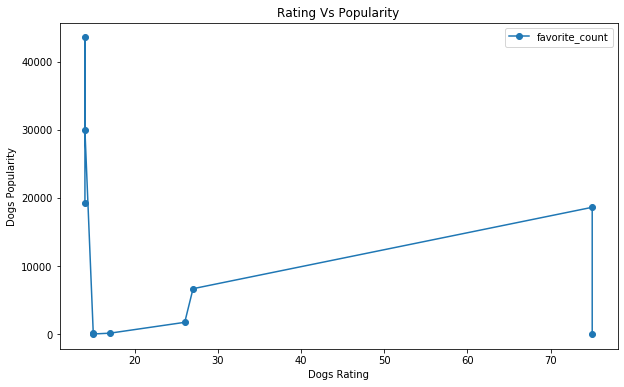

In [1441]:
## Create visualizations:
top_ten_dog.plot('rating_numerator','favorite_count', marker='o',figsize=(10,6),title='Rating Vs Popularity')
plt.xlabel('Dogs Rating')
plt.ylabel('Dogs Popularity')

Above result shows that there is no relation between Dog's rating  and popularity.  A highly rated dog doesn't mean  that dog is more popular.

### Question 2. Most popular dog stage in terms of favorite_count and retweet_count

In [1442]:
#Most popular dog stage in terms of favorite_count

df = twitter_archive_clean.groupby(['dog_stage'])['retweet_count','favorite_count'].sum().reset_index()
df

E:\abac855\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,dog_stage,retweet_count,favorite_count
0,doggo,603305,1495409
1,floofer,89904,278425
2,pupper,626351,1603414
3,puppo,180211,579086


Text(0.5, 1.0, 'dog stage vs popularity ')

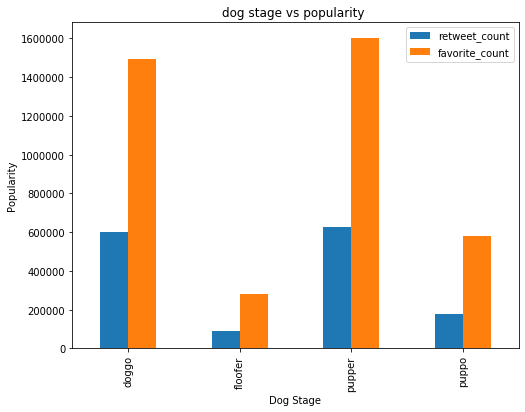

In [1443]:
## Create visualizations:
df.plot(x="dog_stage", y=["retweet_count", "favorite_count"],figsize=(8,6), kind="bar")
plt.xlabel('Dog Stage')
plt.ylabel('Popularity')
plt.title('dog stage vs popularity ')

#  floofer --> Any dog
# pupper (small dog) --> puppo (teenager dog) --> doggo (Old dog)

 As per **Dogtionary** -
>  `pupper (small dog) --> puppo (teenager dog) --> doggo (old dog)`              
> `floofer --> Any dog`


From above result we can say that `pupper` stage is the stage when dog is most popular.
In other phrase, small dog is more popular than `teenager/puppo` and `old/doggo` dog.

`old/doggo dog` is more populatr than `teenager/puppo` but less popular than `small/pupper` dog



### Question 3. Which dogs breeds are most common .

In [1444]:
# Most common dogs breeds as per algorithm's P1

p1_dog = image_predictions_clean.query("p1_dog == True")
p1_dog = p1_dog.groupby(['p1'])['p1_dog'].sum()
p1_dog = p1_dog.to_frame()
#

# Select top 5 
p1_dog.nlargest(5,'p1_dog')

,p1_dog
p1,
Golden_Retriever,150.0
Labrador_Retriever,100.0
Pembroke,89.0
Chihuahua,83.0
Pug,57.0


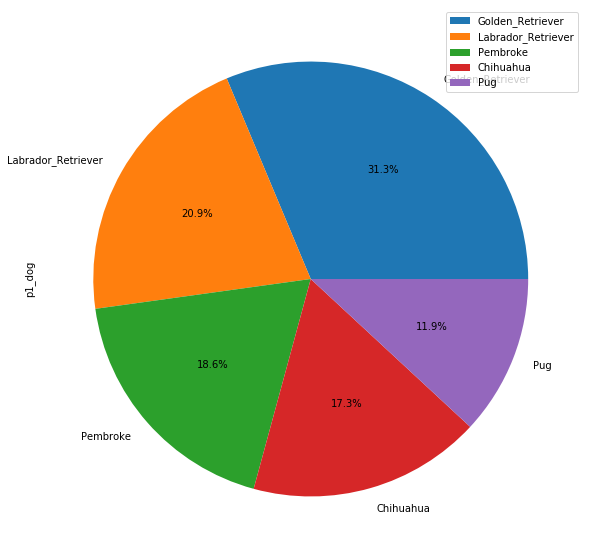

In [1445]:
# Visualization 
p1_dog.nlargest(5,'p1_dog').plot(kind='pie', y='p1_dog',figsize=(15,10), autopct='%1.1f%%')

As per algorithm p1, `Golden_Retriever` is the most common dog breed and after that `Labrador_Retriever`.

In [1446]:
# Most common dogs breeds as per algorithm's P2

p2_dog = image_predictions_clean.query("p2_dog == True")
p2_dog = p2_dog.groupby(['p2'])['p2_dog'].sum()
p2_dog = p2_dog.to_frame()
#

# Select top 5 
p2_dog.nlargest(5,'p2_dog')

,p2_dog
p2,
Labrador_Retriever,104.0
Golden_Retriever,92.0
Cardigan,73.0
Chihuahua,44.0
Pomeranian,42.0


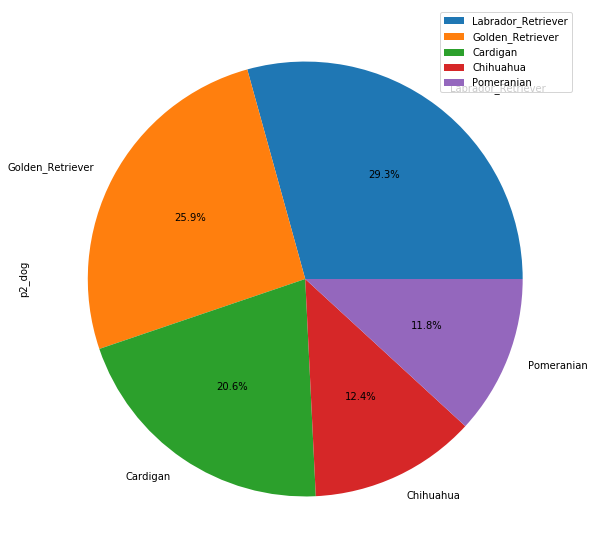

In [1447]:
# Visualization 
p2_dog.nlargest(5,'p2_dog').plot(kind='pie', y='p2_dog',figsize=(15,10), autopct='%1.1f%%')

As per algorithm p2, `Labrador_Retriever` is the most common dog breed and after that `Golden_Retriever`.

In [1448]:
# Most common dogs breeds as per algorithm's P3

p3_dog = image_predictions_clean.query("p3_dog == True")
p3_dog = p3_dog.groupby(['p3'])['p3_dog'].sum()
p3_dog = p3_dog.to_frame()
#

# Select top 5 
p3_dog.nlargest(5,'p3_dog')

,p3_dog
p3,
Labrador_Retriever,79.0
Chihuahua,58.0
Golden_Retriever,48.0
Eskimo_Dog,38.0
Kelpie,35.0


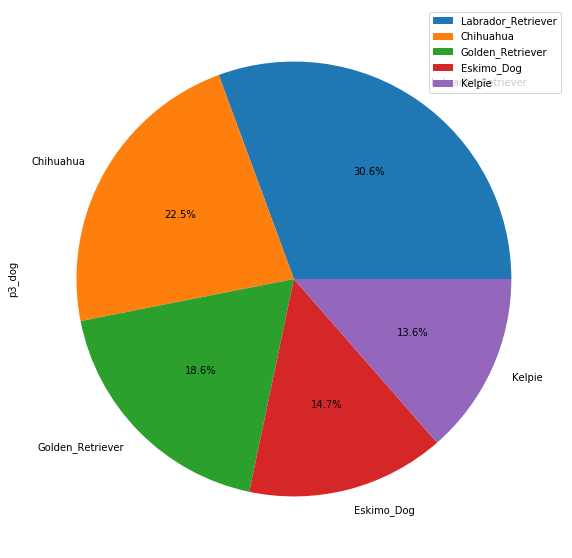

In [1449]:
# Visualization 
p3_dog.nlargest(5,'p3_dog').plot(kind='pie', y='p3_dog',figsize=(15,10), autopct='%1.1f%%')

As per algorithm p3, `Labrador_Retriever` is the most common dog breed and after that `Chihuahua`.

### Question 4.  In which month people are more active on Twitter

Text(0.5, 1.0, 'Number of tweets by Month')

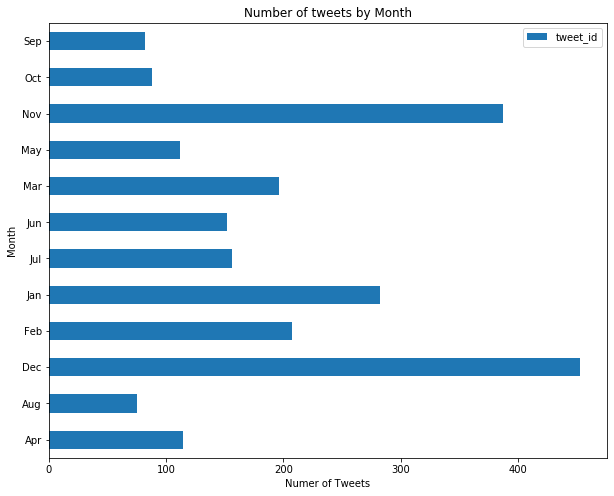

In [1452]:
twitter_archive_clean.groupby(['month']).count().plot(y='tweet_id',kind='barh',figsize=(10,8))
plt.xlabel('Numer of Tweets')
plt.ylabel('Month')
plt.title('Number of tweets by Month')

From above result we can say that, people are more active on Twitter in December month.

### Question 5.  What are the different sources of  tweets.

In [1454]:
source_count = twitter_archive_clean.source.value_counts()
print(source_count)

Twitter for iPhone     2171
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                 9
Name: source, dtype: int64


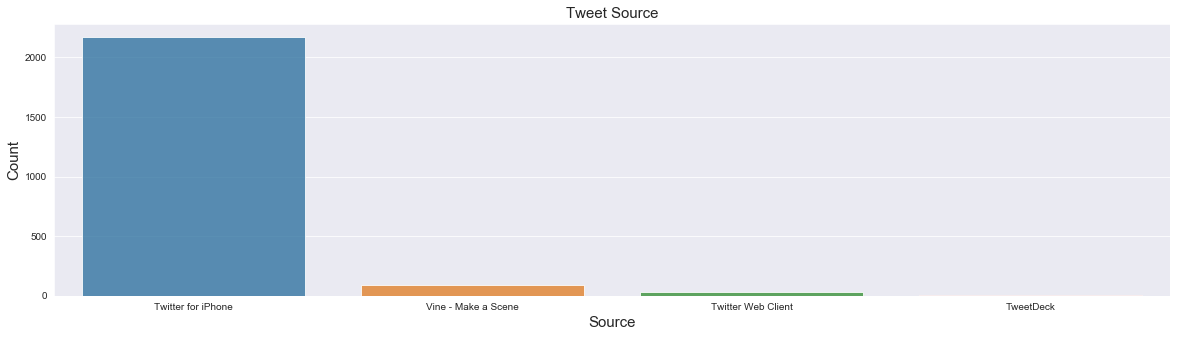

In [1468]:
## Create visualizations:
plt.figure(figsize=(20,5))
sns.barplot(source_count.index, source_count.values, alpha=0.8)
plt.title('Tweet Source',fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Source', fontsize=15)
plt.show()

Above result shows that 'Twitter for iPhone' is the most popular platoform. 

<a id='conclusions'></a>
## Conclusions

We collected data from WeRateDogs Twitter archive for year 2015,2016 and 2017 and different sources for analyses.

We wrangled the dataset and tried to answer quite a few questions which are summarised below:

> * There is no relation between Dog's rating  and popularity.  A highly rated dog doesn't mean  that dog is more popular.

> * `pupper` stage is the stage when dog is most popular.
In other phrase, small dog is more popular than `teenager/puppo` and `old/doggo` dog. `old/doggo dog` is more populatr than `teenager/puppo` but less popular than `small/pupper` dog

> * As per algorithm p1, `Golden_Retriever` is the most common dog breed and after that `Labrador_Retriever`.

> * People are more active on Twitter in December month.

> * `Twitter for iPhone` is the most popular platoform. 


## Reference
>   * [Stack Overflow](https://stackoverflow.com/)
>   * [Pandas](https://pandas.pydata.org/)